In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Listing out the datasets to use
main_df = pd.read_csv('pd_calls_for_service_2023_datasd.csv')
beat_codes_df = pd.read_csv('pd_beat_codes_list_datasd.csv')
dispo_codes_df = pd.read_csv('pd_dispo_codes_datasd.csv')
call_types_df = pd.read_csv('pd_cfs_calltypes_datasd.csv')


In [3]:
# Dropping columns that are not needed from call_types_df
call_types_df = call_types_df.drop({'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, axis=1)

In [4]:
# Merging the main, pd_df with the beat_codes so we can see descriptions of the beats
main_df = main_df.merge(beat_codes_df,
                           left_on=['beat'], right_on=['beat'])
main_df.rename(columns={'beat': 'beat_code', 
                        'neighborhood': 'beat_neighborhood'}, inplace=True)

In [5]:
# Merging the pd_df with the disposition codes so we can see descriptions of the dispositions
dispo_codes_df.rename(columns={'dispo_code': 'disposition', 'description': 'dispo_description'}, 
                      inplace=True)
main_df = main_df.merge(dispo_codes_df,
                           left_on=['disposition'], right_on=['disposition'])

In [6]:
# Merging the pd_df with the call type codes so we can see descriptions of the call types
main_df = main_df.merge(call_types_df,
                           left_on=['call_type'], right_on=['call_type'])
main_df.rename(columns={'description': 'call_type_description'}, 
                      inplace=True)

In [7]:
priority_short_description_dictionary = {2: 'Dispatch as quickly as possible', 
                                         3: 'Dispatch as quickly as possible', 
                                         1: 'Dispatch Immediately', 
                                         4: 'Dispatch when no higher priority calls are waiting',
                                         0: 'Dispatch Immediately',
                                         9: 'Calls that are formatted for the Telephone Report Unit (TRU)'}
priority_long_description_dictionary = {2: 'Priority Two calls involve complaints regarding less serious crimes in which there is no threat to life. Examples include: prowlers who have left, preserve the peace, crime reports for residents standing by at an inconvenient location, blocked driveway when the caller is waiting to leave, injured animals, loud parties with mitigating circumstances', 
                                         3: 'Priority Three calls involve minor crimes or requests for service which are not urgent. Examples include: investigating a cold crime, loud parties involving noise only.', 
                                         1: 'Priority One calls involve serious crimes in progress or a threat to life. Examples include: missing children, child abuse, domestic violence, disturbances involving weapons/violence and bomb threats', 
                                         4: ' Priority Four calls involve minor requests for police service. Examples include: found property, most parking violations, etc.',
                                         0: 'Priority E calls involve an imminent threat to life. Examples include: officer or person down, no detail accidents and attempted suicide',
                                         9: 'Priority Nine calls involve requests for police service, which have limited or no suspect information. Examples include: petty theft, vehicle break-in and false use of another’s identity.'}
main_df['priority_short'] = main_df['priority'].map(priority_short_description_dictionary)
main_df['priority_long'] = main_df['priority'].map(priority_long_description_dictionary)



In [8]:
# Converting object of date_time to an actual datetime
main_df['date_time'] = pd.to_datetime(main_df['date_time'])

In [9]:
main_df= main_df.loc[:,['incident_num', 
                        'date_time',
                        'day_of_week',
                        'address_number_primary',
                        'address_dir_primary',
                        'address_road_primary',
                        'address_sfx_primary',
                        'address_dir_intersecting',
                        'address_road_intersecting',
                        'address_sfx_intersecting',
                        'call_type',
                        'call_type_description',
                        'disposition',
                        'dispo_description',
                        'beat_code',
                        'beat_neighborhood',
                        'priority',
                        'priority_short',
                        'priority_long']]


In [16]:
# Rows/columns of dataset
main_df.shape

(30878, 19)

In [17]:
main_df.describe()

,day_of_week,address_number_primary,address_dir_intersecting,address_sfx_intersecting,beat_code,priority
count,30878.000000,30878.000000,0.0,0.0,30878.000000,30878.000000
mean,3.977265,3396.312909,NaN,NaN,500.794676,2.078567
std,1.992472,3366.118416,NaN,NaN,231.011188,1.176595
min,1.000000,0.000000,NaN,NaN,111.000000,0.000000
25%,2.000000,700.000000,NaN,NaN,314.000000,1.000000
50%,4.000000,2800.000000,NaN,NaN,521.000000,2.000000
75%,6.000000,4800.000000,NaN,NaN,627.000000,3.000000
max,7.000000,53500.000000,NaN,NaN,937.000000,9.000000


In [14]:
main_df.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,call_type_description,disposition,dispo_description,beat_code,beat_neighborhood,priority,priority_short,priority_long
0,E23010000001,2023-01-01 00:00:05,1,0,NaN,05TH,AVE,NaN,G,NaN,FD,FLAG DOWN/FIELD INITIATED,CAN,CANCEL,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
1,E23010000116,2023-01-01 01:07:04,1,500,NaN,F,ST,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,CAN,CANCEL,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
2,E23010000130,2023-01-01 01:27:25,1,0,NaN,04TH,AVE,NaN,MARKET,NaN,FD,FLAG DOWN/FIELD INITIATED,CAN,CANCEL,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
3,E23010000213,2023-01-01 02:49:54,1,500,NaN,MARKET,ST,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,CAN,CANCEL,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
4,E23010008343,2023-01-07 00:49:56,7,800,NaN,05TH,AVE,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,CAN,CANCEL,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...


In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30878 entries, 0 to 30877
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   incident_num               30878 non-null  object        
 1   date_time                  30878 non-null  datetime64[ns]
 2   day_of_week                30878 non-null  int64         
 3   address_number_primary     30878 non-null  int64         
 4   address_dir_primary        1480 non-null   object        
 5   address_road_primary       30877 non-null  object        
 6   address_sfx_primary        28418 non-null  object        
 7   address_dir_intersecting   0 non-null      float64       
 8   address_road_intersecting  4937 non-null   object        
 9   address_sfx_intersecting   0 non-null      float64       
 10  call_type                  30878 non-null  object        
 11  call_type_description      30878 non-null  object        
 12  disp

In [11]:
main_df.call_type.value_counts()

415       4412
SELENF    1788
T         1671
459A      1537
CW        1236
          ... 
ASST         1
ALERT3       1
272          1
INFOX        1
595          1
Name: call_type, Length: 203, dtype: int64

In [19]:
main_df.priority.value_counts()

2    15059
1     6049
3     5936
4     1771
0     1716
9      347
Name: priority, dtype: int64

In [20]:
main_df.beat_neighborhood.value_counts()

East Village        1802
Pacific Beach       1207
Core-Columbia       1026
Midway District     1000
Kearny Mesa          859
                    ... 
Qualcomm              17
La Playa              15
Broadway Heights      11
Islenair               5
Burlingame             2
Name: beat_neighborhood, Length: 125, dtype: int64

In [29]:
main_df.duplicated().sum()
# Drops 2459 duplicates
main_df = main_df.drop_duplicates()

In [30]:
main_df.duplicated().sum()

0

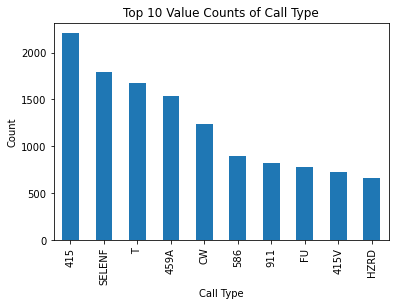

In [41]:
# Creating a bar chart for top 10 call_types
call_type = main_df.call_type.value_counts()
call_type_top_ten = call_type.head(10)
call_type_top_ten.plot(kind="bar")
plt.title("Top 10 Value Counts of Call Type")
plt.xlabel("Call Type")
plt.ylabel("Count")
plt.show()

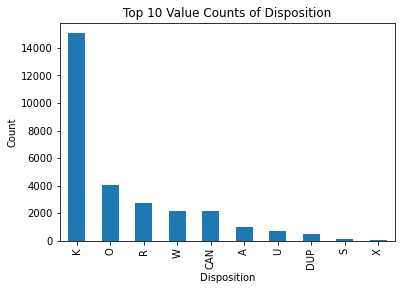

In [42]:
# Creating a bar chart for top 10 dispositions
disposition = main_df.disposition.value_counts()
disposition_top_ten = disposition.head(10)
disposition_top_ten.plot(kind="bar")
plt.title("Top 10 Value Counts of Disposition")
plt.xlabel("Disposition")
plt.ylabel("Count")
plt.show()

In [43]:
k_loc = main_df.loc[main_df['disposition'] == 'K']
k_loc

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,call_type_description,disposition,dispo_description,beat_code,beat_neighborhood,priority,priority_short,priority_long
50,E23010000115,2023-01-01 01:04:57,1,800,NaN,06TH,AVE,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,K,NO REPORT REQUIRED,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
51,E23010000127,2023-01-01 01:22:56,1,0,NaN,04TH,AVE,NaN,MARKET,NaN,FD,FLAG DOWN/FIELD INITIATED,K,NO REPORT REQUIRED,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
52,E23010000162,2023-01-01 01:58:06,1,800,NaN,05TH,AVE,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,K,NO REPORT REQUIRED,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
53,E23010000180,2023-01-01 02:16:49,1,0,NaN,05TH,AVE,NaN,F,NaN,FD,FLAG DOWN/FIELD INITIATED,K,NO REPORT REQUIRED,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
54,E23010001300,2023-01-02 00:27:56,2,500,NaN,05TH,AVE,NaN,NaN,NaN,FD,FLAG DOWN/FIELD INITIATED,K,NO REPORT REQUIRED,523,Gaslamp,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30847,E23010001533,2023-01-02 08:14:22,2,700,E,SAN YSIDRO,BLV,NaN,NaN,NaN,MEXICO,LIAISON UNITS VISITING MEXICO,K,NO REPORT REQUIRED,714,Border,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
30848,E23010015609,2023-01-12 08:11:27,5,700,E,SAN YSIDRO,BLV,NaN,NaN,NaN,MEXICO,LIAISON UNITS VISITING MEXICO,K,NO REPORT REQUIRED,714,Border,2,Dispatch as quickly as possible,Priority Two calls involve complaints regardin...
30849,E23010002322,2023-01-02 21:36:52,2,4700,NaN,HOME,AVE,NaN,NaN,NaN,TLO,TERRORISM LIAISON OFFICER,K,NO REPORT REQUIRED,836,Swan Canyon,1,Dispatch Immediately,Priority One calls involve serious crimes in p...
30850,E23010004844,2023-01-04 16:11:47,4,4700,NaN,HOME,AVE,NaN,NaN,NaN,TLO,TERRORISM LIAISON OFFICER,K,NO REPORT REQUIRED,836,Swan Canyon,1,Dispatch Immediately,Priority One calls involve serious crimes in p...


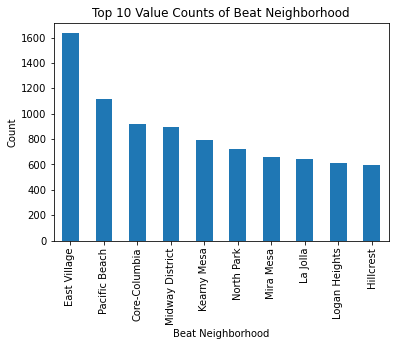

In [44]:
# Creating a bar chart for top 10 neighborhoods
neighborhood = main_df.beat_neighborhood.value_counts()
neighborhood_top_ten = neighborhood.head(10)
neighborhood_top_ten.plot(kind="bar")
plt.title("Top 10 Value Counts of Beat Neighborhood")
plt.xlabel("Beat Neighborhood")
plt.ylabel("Count")
plt.show()

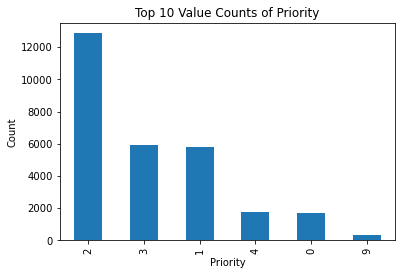

In [45]:
# Creating a bar chart for top 10 priorities
priority = main_df.priority.value_counts()
priority_top_ten = priority.head(10)
priority_top_ten.plot(kind="bar")
plt.title("Top 10 Value Counts of Priority")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()